<a href="https://colab.research.google.com/github/takafumisato2020/TS/blob/Dataanalysis_10/report9_200619.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#rstanがインストールされていないならインストールする
x<-installed.packages()
if(any(x[,1]== 'rstan') == FALSE){
    system("add-apt-repository -y ppa:marutter/rrutter3.5")
    system("add-apt-repository -y ppa:marutter/c2d4u3.5") 
    system("apt-get update")
    system("apt install -y r-cran-rstan")
}

In [ ]:
auto <- read.csv("Automobile.csv")

In [ ]:
auto

make,fuel.type,curb.weight
<fct>,<fct>,<int>
alfa-romero,gas,2548
alfa-romero,gas,2548
alfa-romero,gas,2823
audi,gas,2337
audi,gas,2824
audi,gas,2507
audi,gas,2844
audi,gas,2954
audi,gas,3086


In [ ]:
weight.gas <- auto[auto$fuel.type=="gas",]$curb.weight

In [ ]:
weight.diesel <- auto[auto$fuel.type=="diesel",]$curb.weight

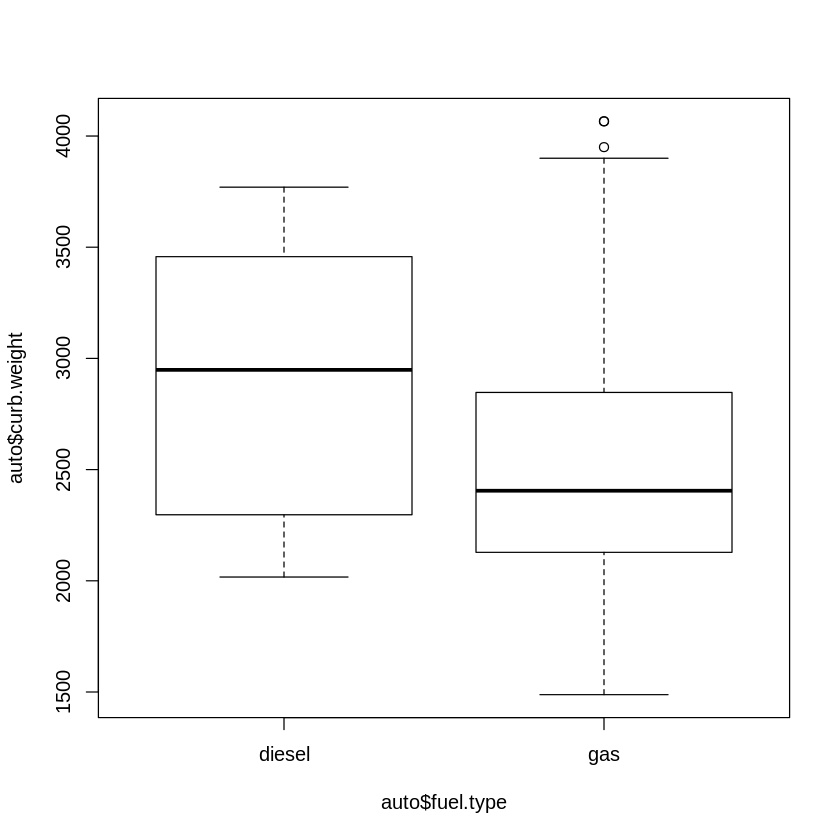

In [ ]:
boxplot(auto$curb.weight ~ auto$fuel.type)

In [ ]:
library(rstan)
#表3.1のデータ、クラスA、クラスBの順に入力
#mathA <- c(49,66,69,55,54,72,51,76,40,62,66,51,59,68,66,57,53,66,58,57)
#mathB <- c(41,55,21,49,53,50,52,67,54,69,57,48,31,52,56,50,46,38,62,59)

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.19.3, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)



In [ ]:
# ここでstanのコードをstancodeという変数に入れます
# 以下は 1group.stan の例
stancode <- '
data {
  int n1; // 第1群のデータ数
  int n2; // 第2群のデータ数
  real x1[n1]; // 第1群のデータ
  real x2[n2]; // 第2群のデータ
}

parameters {
  real mu1; // 第1群の平均μ1
  real mu2; // 第2群の平均μ2
  real<lower=0> sigma; // 第1群、第2群の標準偏差σ
}

model {
  mu1 ~ uniform(0,10000);
  mu2 ~ uniform(0,10000);
  sigma ~ uniform(0,5000);

  x1 ~ normal(mu1,sigma);
  x2 ~ normal(mu2,sigma);
}

generated quantities {
  real mu1_minus_mu2;
  real u_mu1_gt_mu2;
  real u_mu1_minus_mu2_gt_5;
  real delta;
  real u_delta_gt_03;
  real U3;
  real u_U3_gt_06;
  real pi_d;
  real u_pi_d_gt_08;

  mu1_minus_mu2 = mu1 - mu2; // μ1-μ2 式(3.11)
  u_mu1_gt_mu2 = mu1 - mu2 > 0; // u_{μ1>μ2} 式(3.12)
  u_mu1_minus_mu2_gt_5 = mu1 - mu2 > 5; // u_{μ1-μ2>c} 式(3.13)
  delta = (mu1 - mu2) / sigma; // δ 式(3.15)
  u_delta_gt_03 = delta > 0.1; // u_{δ>c} 式(3.16)
  U3 = normal_cdf(mu1, mu2, sigma); // U3 式(3.17)
  u_U3_gt_06 = U3 > 0.6; // u_{U3>c} 式(3.21)
  pi_d = normal_cdf(delta / sqrt(2), 0, 1); // πd 式(3.24)
  u_pi_d_gt_08 = pi_d > 0.8; // u_{πd>c} 式(3.26)
}
'

In [ ]:
fit <- stan(model_code = stancode,
            data=list(n1=length(weight.gas),
                      n2=length(weight.diesel),
                      x1=weight.gas,
                      x2=weight.diesel),
            iter=21000,warmup=1000,chains=5)


SAMPLING FOR MODEL '757a8ae6d98325dc0e9ac5a2ad0e3e4b' NOW (CHAIN 1).
Chain 1: Rejecting initial value:
Chain 1:   Log probability evaluates to log(0), i.e. negative infinity.
Chain 1:   Stan can't start sampling from this initial value.
Chain 1: 
Chain 1: Gradient evaluation took 9e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:     1 / 21000 [  0%]  (Warmup)
Chain 1: Iteration:  1001 / 21000 [  4%]  (Sampling)
Chain 1: Iteration:  3100 / 21000 [ 14%]  (Sampling)
Chain 1: Iteration:  5200 / 21000 [ 24%]  (Sampling)
Chain 1: Iteration:  7300 / 21000 [ 34%]  (Sampling)
Chain 1: Iteration:  9400 / 21000 [ 44%]  (Sampling)
Chain 1: Iteration: 11500 / 21000 [ 54%]  (Sampling)
Chain 1: Iteration: 13600 / 21000 [ 64%]  (Sampling)
Chain 1: Iteration: 15700 / 21000 [ 74%]  (Sampling)
Chain 1: Iteration: 17800 / 21000 [ 84%]  (Sampling)
Chain 1: Iteration:

Warning message:
“The largest R-hat is NA, indicating chains have not mixed.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#tail-ess”


In [ ]:
# パラメータの事後分布（推測結果）
print(fit,probs=c(0.025,0.05,0.25, 0.5,0.75, 0.95,0.975), digits = 3)

Inference for Stan model: 757a8ae6d98325dc0e9ac5a2ad0e3e4b.
5 chains, each with iter=21000; warmup=1000; thin=1; 
post-warmup draws per chain=20000, total post-warmup draws=1e+05.

                          mean se_mean      sd      2.5%        5%       25%
mu1                   2518.258   0.115  37.475  2444.765  2456.634  2493.067
mu2                   2898.923   0.358 115.041  2672.874  2708.842  2821.643
sigma                  512.618   0.082  25.510   465.678   472.565   494.883
mu1_minus_mu2         -380.665   0.377 121.089  -618.013  -579.868  -462.003
u_mu1_gt_mu2             0.001   0.000   0.032     0.000     0.000     0.000
u_mu1_minus_mu2_gt_5     0.001   0.000   0.029     0.000     0.000     0.000
delta                   -0.744   0.001   0.239    -1.212    -1.137    -0.905
u_delta_gt_03            0.000     NaN   0.012     0.000     0.000     0.000
U3                       0.235   0.000   0.072     0.113     0.128     0.183
u_U3_gt_06               0.000     NaN   0.003   

In [ ]:
# 発生させたパラメータのヒストグラム
stan_hist(fit,pars=c("mu1","mu2","sigma"))

In [ ]:
# パラメータの事後分布（小数以下3桁表示）
print(fit,probs=c(0.025,0.05,0.95,0.975),digits=3)